In [1]:
# August 4 2017
# This file is for experiments with student2 4 skills and training trajectory length 7
# to check different architectures and whether they can learn good models
# This uses student2a where transitions happen after observations

%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy as sp
import six
from matplotlib.pyplot import *

def graph_trainauc_score(vloss, scores):
    xs = np.sum(vloss,axis=1)
    ys = scores
    title('Training Loss AUC versus Actual Performance')
    xlabel('Training Loss AUC')
    ylabel('Posttest Score')
    plot(xs,ys,'.')
    ylim(0,1)

(10, 21)
last 0.00082721109123 threshold 0.00083


(0.0008, 0.0009)

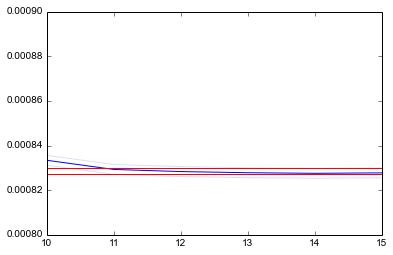

In [8]:
'''
Default Double LSTM
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_model_mid-dropout10-shuffle0-data-test2a-n100000-l7-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00083
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

xlim(10, 15)
ylim(0.0008,0.0009)

# looks like epoch 11 is good for 0.00001

(10, 21)
last 1.26454271348e-07 threshold 1e-05


(0.0, 2e-05)

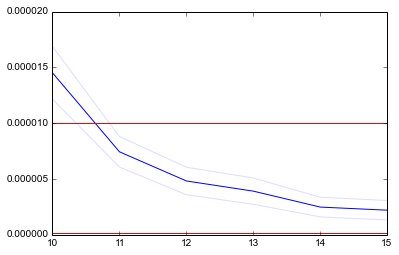

In [12]:
'''
Single LSTM
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_modelsimple_mid-dropout10-shuffle0-data-test2a-n100000-l7-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

xlim(10, 15)
ylim(0.0000,0.00002)

# looks like epoch 11 is good for 0.00001

(10, 21)
last 5.70529222001e-08 threshold 1e-05


(0.0, 2e-05)

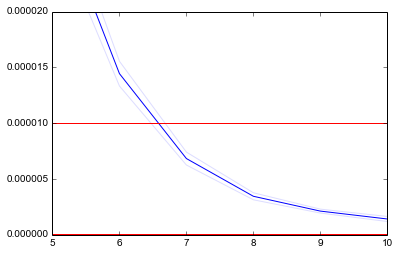

In [14]:
'''
Single GRU
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_modelgrusimple_mid-dropout10-shuffle0-data-test2a-n100000-l7-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

xlim(5, 10)
ylim(0.0000,0.00002)

# looks like epoch 7 is good for 0.00001

vloss shape (50, 12)
scores shape (50,)
[ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.98958333  1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.        ]
[ 0.96692989  0.96348646  0.97575386  0.97630844  0.92562116  0.97874301
  0.96683524  0.96063162  0.97346228  0.96706728  0.97284721  0.11730303
  0.95794361  0.97510929  0.93448798  0.95581222  0.90395363  0.96616738
  0.96260725  0.95714526  0.97295479  0.94899324  0.96467886  0.962852
  0.93967585  0.9556808   0.94081753  0.97427376  0.94030854  0.95607255
  0.94617207  0.96266973  0.96693427  0.9685

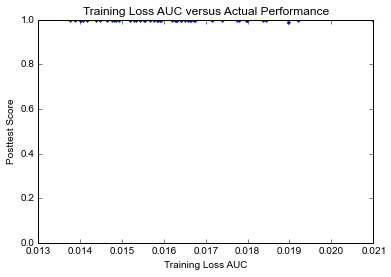

In [6]:
'''
Analyzing results of student2 with 4 skills, with training length 7 and testing length 6.
Double LSTM
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2_model_mid-dropout10-shuffle0-data-test2a-n100000-l7-random.pickle/stats-runA.npz')
data21 = np.load('experiments/test2_model_mid-dropout10-shuffle0-data-test2a-n100000-l7-random.pickle/mcts-rtype2-rollouts3000-trajectories100-real1-runA.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss)
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)
six.print_(qvals)

graph_trainauc_score(vloss, scores)

vloss shape (50, 12)
scores shape (50,)
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 0.94276331  0.93528544  0.892439    0.91454201  0.92495785  0.92519833
  0.84794563  0.95246892  0.94188326  0.89435938  0.82447057  0.88340758
  0.81780504  0.94627136  0.91513866  0.88441024  0.95268621  0.94056686
  0.94782128  0.95362336  0.9362926   0.02956519  0.94293565  0.9316867
  0.91197571  0.85339819  0.9499515   0.90905925  0.84491883  0.91941925
  0.92658014  0.90348142  0.92863746  0.84932306  0.93453939  0.93108999
  0.92525348  0.95223781  0.93281489  0.94272056  0.9380495   0.90262327
  0.92301086  0.88497127  0.90512614  0.15495689  0.91361347  0.83949541
  0.83294159  0.89379605]


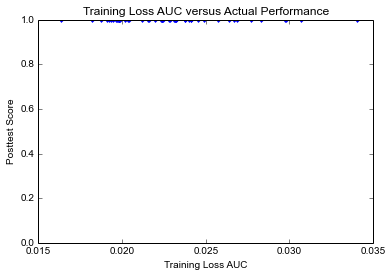

In [7]:
'''
Analyzing results of student2 with 4 skills, with training length 7 and testing length 6.
Single LSTM
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2_modelsimple_mid-dropout10-shuffle0-data-test2a-n100000-l7-random.pickle/stats-runA.npz')
data21 = np.load('experiments/test2_modelsimple_mid-dropout10-shuffle0-data-test2a-n100000-l7-random.pickle/mcts-rtype2-rollouts3000-trajectories100-real1-runA.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss)
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)
six.print_(qvals)

graph_trainauc_score(vloss, scores)

vloss shape (50, 8)
scores shape (50,)
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.]
[  8.22305304e-01   9.09831885e-01   8.66564758e-01   9.19974608e-01
   9.05364083e-01   9.12316602e-01   8.78267350e-01   8.75047019e-01
   9.02455418e-01   8.67595505e-01   8.75076808e-01   8.71777541e-01
   8.75749997e-01   8.67648618e-01   8.63660092e-01   8.84148451e-01
   8.88984383e-01   8.94084233e-01   8.89301768e-01   8.87288235e-01
   8.90588765e-01   9.08307554e-01   9.02611484e-01   9.06550043e-01
   9.02724409e-01   8.97119748e-01   7.68224212e-01   9.09954737e-01
   9.04982789e-01   9.01760179e-01   8.38465743e-01   8.35067700e-01
   9.07928759e-01   8.75757935e-01   8.60967036e-01   8.97512456e-01
   8.96418934e-01   8.65447587e-01   9.01308550e-01   8.56252009e-01
   8.03717522e-01   9.10022942e-01   8.46671755e-01   8.57415611e-0

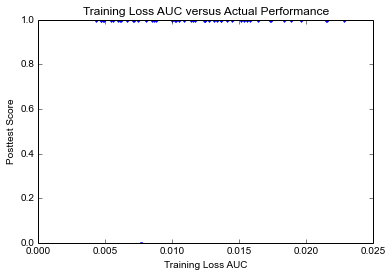

In [8]:
'''
Analyzing results of student2 with 4 skills, with training length 7 and testing length 6.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2_modelgrusimple_mid-dropout10-shuffle0-data-test2a-n100000-l7-random.pickle/stats-runA.npz')
data21 = np.load('experiments/test2_modelgrusimple_mid-dropout10-shuffle0-data-test2a-n100000-l7-random.pickle/mcts-rtype2-rollouts3000-trajectories100-real1-runA.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss)
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)
six.print_(qvals)

graph_trainauc_score(vloss, scores)

# Small size Models

(10, 21)
last 1.20780628076e-05 threshold 2e-05


(0.0, 3e-05)

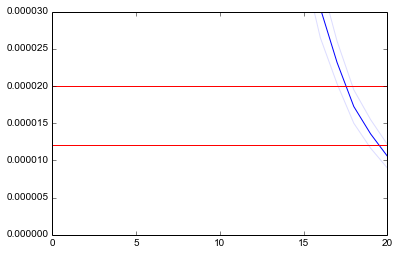

In [10]:
'''
Single LSTM
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_modelsimple_small-dropout10-shuffle0-data-test2a-n100000-l7-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00002
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

#xlim(10, 15)
ylim(0.0000,0.00003)

# looks like 20 epochs is not quite enough for 0.00001, but epoch 20 should be just barely there

(10, 21)
last 4.71345687476e-06 threshold 1e-05


(0.0, 2e-05)

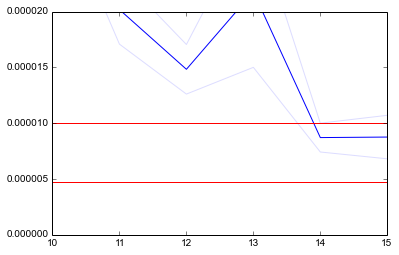

In [15]:
'''
Single GRU
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_modelgrusimple_small-dropout10-shuffle0-data-test2a-n100000-l7-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

xlim(10, 15)
ylim(0.0000,0.00002)

# looks like 14 is enough for 0.00001

vloss shape (20, 21)
scores shape (20,)
[ 1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]
[ 0.94257786  0.91655469  0.91142697  0.01566587  0.00866144  0.88393161
  0.97940561  0.72608578  0.00199043  0.67349941  0.98901708  0.96953458
  0.9601016   0.95678089  0.70323127  0.95531483  0.25703748  0.88540291
  0.84718989  0.97567757]


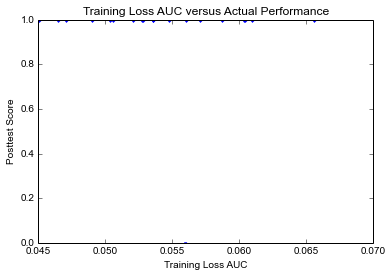

In [2]:
'''
Analyzing results of student2 with 4 skills, with training length 7 and testing length 6.
Single LSTM
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2_modelsimple_small-dropout10-shuffle0-data-test2a-n100000-l7-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2_modelsimple_small-dropout10-shuffle0-data-test2a-n100000-l7-random.pickle/mcts-rtype2-rollouts3000-trajectories100-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss)
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)
six.print_(qvals)

graph_trainauc_score(vloss, scores)

vloss shape (20, 15)
scores shape (20,)
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]
[ 0.94439779  0.93964646  0.96714884  0.93836769  0.94303601  0.9716888
  0.97106572  0.97641547  0.96460504  0.91345139  0.95043402  0.92758851
  0.96540413  0.96874956  0.96041814  0.973172    0.96580921  0.92123838
  0.95921225  0.94938566]


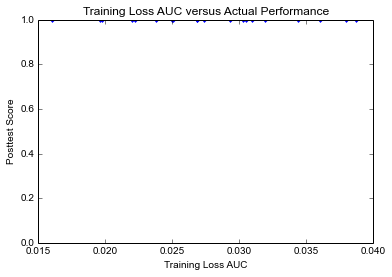

In [3]:
'''
Analyzing results of student2 with 4 skills, with training length 7 and testing length 6.
Single GRUE
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2_modelgrusimple_small-dropout10-shuffle0-data-test2a-n100000-l7-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2_modelgrusimple_small-dropout10-shuffle0-data-test2a-n100000-l7-random.pickle/mcts-rtype2-rollouts3000-trajectories100-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss)
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)
six.print_(qvals)

graph_trainauc_score(vloss, scores)